In [1]:
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
#Re-index so that content is the indexer and drop unnecessary columns
#Load dataframe for incubation
# df = pd.read_excel(r"./LoD_echos/2022_02_25_Brendan_LOD_optimisation.xlsx", index_col=2)
df = pd.read_excel(r"LoD_echos/2022_03_11_Brendan_LOD_optimisation.xlsx", index_col=2)
df = df.drop(columns = ['Well'])
df = df.set_index('Content')
df1 = df.iloc[:, : 59]
df2 = df.iloc[:,59:-1]

In [4]:
# concs = np.array([0,234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9])/10
concs = [0,3.538608749,7.077217498,10.61582625,14.154435,17.69304375,21.23165249,24.77026124,28.30886999,31.84747874,35.38608749,38.92469624,42.46330499,46.00191374,49.54052249,53.07913124]

In [5]:
def cleanData(trip,stdwidth = 2):
    i = 0
    take_data = []
    trip_meantest = trip.mean(axis=0)
    trip_stdtest = trip.std(axis=0)
    while i < 24:
        try:
            if (trip_meantest[-1] + stdwidth * trip_stdtest[-1] < trip.iloc[i][-1]) or (trip_meantest[-1] - stdwidth * trip_stdtest[-1] > trip.iloc[i][-1]):
                take_data.append(False)
            else:
                take_data.append(True)
        except:
            if (trip_meantest[-1] + stdwidth * trip_stdtest[-1] < trip[i][-1]) or (trip_meantest[-1] - stdwidth * trip_stdtest[-1] > trip[i][-1]):
                take_data.append(False)
            else:
                take_data.append(True)
        i += 1
    try: return trip.iloc[take_data]
    except: return trip[take_data]

In [6]:
#Make variables for time and separate into triplicates
Time = df1.loc['Time [h]']*60

Trip_mean = []
Trip_std = []
Trip_mean_norm = []
Trip_std_norm = []
for i in range(16):
    sample = 'Sample X' + str(i+1)
    Trip = df1.loc[sample]
    Trip_norm = np.array(df1.loc[sample])/np.array(df2.loc[sample])
    Trip_mean_single = cleanData(Trip).mean(axis=0)
    Trip_std_single = cleanData(Trip).std(axis=0)
    Trip_mean_norm_single = cleanData(Trip_norm).mean(axis=0)
    Trip_std_norm_single = cleanData(Trip_norm).std(axis=0)
    Trip_mean.append(Trip_mean_single)
    Trip_std.append(Trip_std_single)
    Trip_mean_norm.append(Trip_mean_norm_single)
    Trip_std_norm.append(Trip_std_norm_single)
    
Trip1 = df1.loc['Sample X1']
Trip1 = cleanData(Trip1)
Trip1_mean = Trip1.mean(axis=0)
Trip1_std = Trip1.std(axis=0)

Trip2 = df1.loc['Sample X2']
Trip2 = cleanData(Trip2)
Trip2_mean = Trip2.mean(axis=0)
Trip2_std = Trip2.std(axis=0)

Trip3 = df1.loc['Sample X3']
Trip3 = cleanData(Trip3)
Trip3_mean = Trip3.mean(axis=0)
Trip3_std = Trip3.std(axis=0)

Trip4 = df1.loc['Sample X4']
Trip4 = cleanData(Trip4)
Trip4_mean = Trip4.mean(axis=0)
Trip4_std = Trip4.std(axis=0)

Trip5 = df1.loc['Sample X5']
Trip5 = cleanData(Trip5)
Trip5_mean = Trip5.mean(axis=0)
Trip5_std = Trip5.std(axis=0)

Trip6 = df1.loc['Sample X6']
Trip6 = cleanData(Trip6)
Trip6_mean = Trip6.mean(axis=0)
Trip6_std = Trip6.std(axis=0)

Trip7 = df1.loc['Sample X7']
Trip7 = cleanData(Trip7)
Trip7_mean = Trip7.mean(axis=0)
Trip7_std = Trip7.std(axis=0)

Trip8 = df1.loc['Sample X8']
Trip8 = cleanData(Trip8)
Trip8_mean = Trip8.mean(axis=0)
Trip8_std = Trip8.std(axis=0)

Trip9 = df1.loc['Sample X9']
Trip9 = cleanData(Trip9)
Trip9_mean = Trip9.mean(axis=0)
Trip9_std = Trip9.std(axis=0)

Trip10 = df1.loc['Sample X10']
Trip10 = cleanData(Trip10)
Trip10_mean = Trip10.mean(axis=0)
Trip10_std = Trip10.std(axis=0)

Trip11 = df1.loc['Sample X11']
Trip11 = cleanData(Trip11)
Trip11_mean = Trip11.mean(axis=0)
Trip11_std = Trip11.std(axis=0)

Trip12 = df1.loc['Sample X12']
Trip12 = cleanData(Trip12)
Trip12_mean = Trip12.mean(axis=0)
Trip12_std = Trip12.std(axis=0)

Trip13 = df1.loc['Sample X13']
Trip13 = cleanData(Trip13)
Trip13_mean = Trip13.mean(axis=0)
Trip13_std = Trip13.std(axis=0)

Trip14 = df1.loc['Sample X14']
Trip14 = cleanData(Trip14)
Trip14_mean = Trip14.mean(axis=0)
Trip14_std = Trip14.std(axis=0)

Trip15 = df1.loc['Sample X15']
Trip15 = cleanData(Trip15)
Trip15_mean = Trip15.mean(axis=0)
Trip15_std = Trip15.std(axis=0)

Trip16 = df1.loc['Sample X16']
Trip16 = cleanData(Trip16)
Trip16_mean = Trip16.mean(axis=0)
Trip16_std = Trip16.std(axis=0)

In [7]:
#Plot all data 
fig = go.Figure(go.Scatter(
    ))
fig.add_trace(go.Scatter(x=Time, y=Trip1_mean, error_y = dict(type='data', array=Trip1_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[0])))
fig.add_trace(go.Scatter(x=Time, y=Trip2_mean, error_y = dict(type='data', array=Trip2_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[1])))
fig.add_trace(go.Scatter(x=Time, y=Trip3_mean, error_y = dict(type='data', array=Trip3_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[2]), marker = dict(color = 'brown')))
fig.add_trace(go.Scatter(x=Time, y=Trip4_mean, error_y = dict(type='data', array=Trip4_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[3])))
fig.add_trace(go.Scatter(x=Time, y=Trip5_mean, error_y = dict(type='data', array=Trip5_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[4])))
fig.add_trace(go.Scatter(x=Time, y=Trip6_mean, error_y = dict(type='data', array=Trip6_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[5])))
fig.add_trace(go.Scatter(x=Time, y=Trip7_mean, error_y = dict(type='data', array=Trip7_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[6])))
fig.add_trace(go.Scatter(x=Time, y=Trip8_mean, error_y = dict(type='data', array=Trip8_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[7])))
fig.add_trace(go.Scatter(x=Time, y=Trip9_mean, error_y = dict(type='data', array=Trip9_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[8])))
fig.add_trace(go.Scatter(x=Time, y=Trip10_mean, error_y = dict(type='data', array=Trip10_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[9])))
fig.add_trace(go.Scatter(x=Time, y=Trip11_mean, error_y = dict(type='data', array=Trip11_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[10])))
fig.add_trace(go.Scatter(x=Time, y=Trip12_mean, error_y = dict(type='data', array=Trip12_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[11])))
fig.add_trace(go.Scatter(x=Time, y=Trip13_mean, error_y = dict(type='data', array=Trip13_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[12])))
fig.add_trace(go.Scatter(x=Time, y=Trip14_mean, error_y = dict(type='data', array=Trip14_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[13])))
fig.add_trace(go.Scatter(x=Time, y=Trip15_mean, error_y = dict(type='data', array=Trip15_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[14])))
fig.add_trace(go.Scatter(x=Time, y=Trip16_mean, error_y = dict(type='data', array=Trip16_std), name = 'Buffer + Cas + crRNA + {} pM target DNA'.format(concs[15])))
fig.update_layout(title="FQ5 probe lba Cas 12a Collateral Cleavage assay (gRNA 1 and ssDNA Target 1) 11/3/22", xaxis_title="Time (min)", yaxis_title="Fluorescence (AU)", legend_title="Reaction description", plot_bgcolor = 'white')


fig.show() 

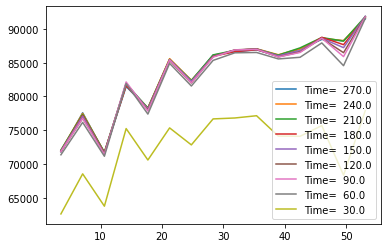

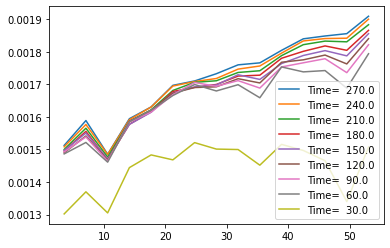

In [8]:
for i in range(1,10):
    i *= 6
    plt.plot(concs[1:],np.array(Trip_mean)[1:, -i], label = 'Time=  {}'.format(Time[-i]))
plt.legend()
plt.show()

for i in range(1,10):
    i *= 6
    plt.plot(concs[1:],np.array(Trip_mean_norm)[1:, -i], label = 'Time=  {}'.format(Time[-i]))
plt.legend()
plt.show()

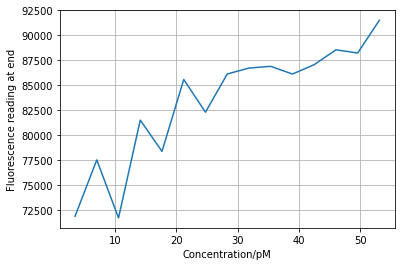

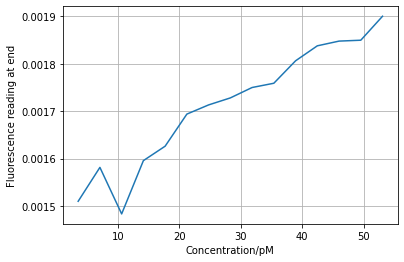

In [10]:
plt.plot(concs[1:],np.array(Trip_mean)[1:,50])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid();plt.show()

plt.plot(concs[1:],np.array(Trip_mean_norm)[1:,50])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid();plt.show()

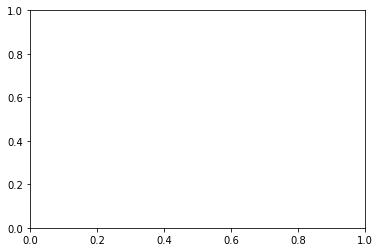

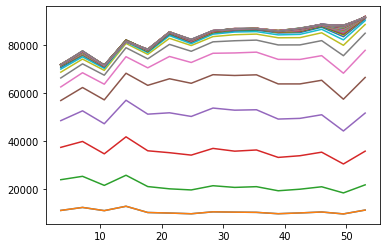

In [11]:
import matplotlib.animation as ani
from IPython.display import HTML
def graphfunc(i):
    ax.cla()
    x = concs[1:]
    y = np.array(Trip_mean)[1:,i]
    error = np.array(Trip_std)[1:,i]
    ax.errorbar(x,y,yerr=error)
    plt.plot(x,y)
    # ax.title('Time = {}'.format(Time[i]))
fig,ax = plt.subplots()
animator = ani.FuncAnimation(fig, graphfunc, frames=57, interval = 200)
# plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid()
plt.show()
HTML(animator.to_html5_video())

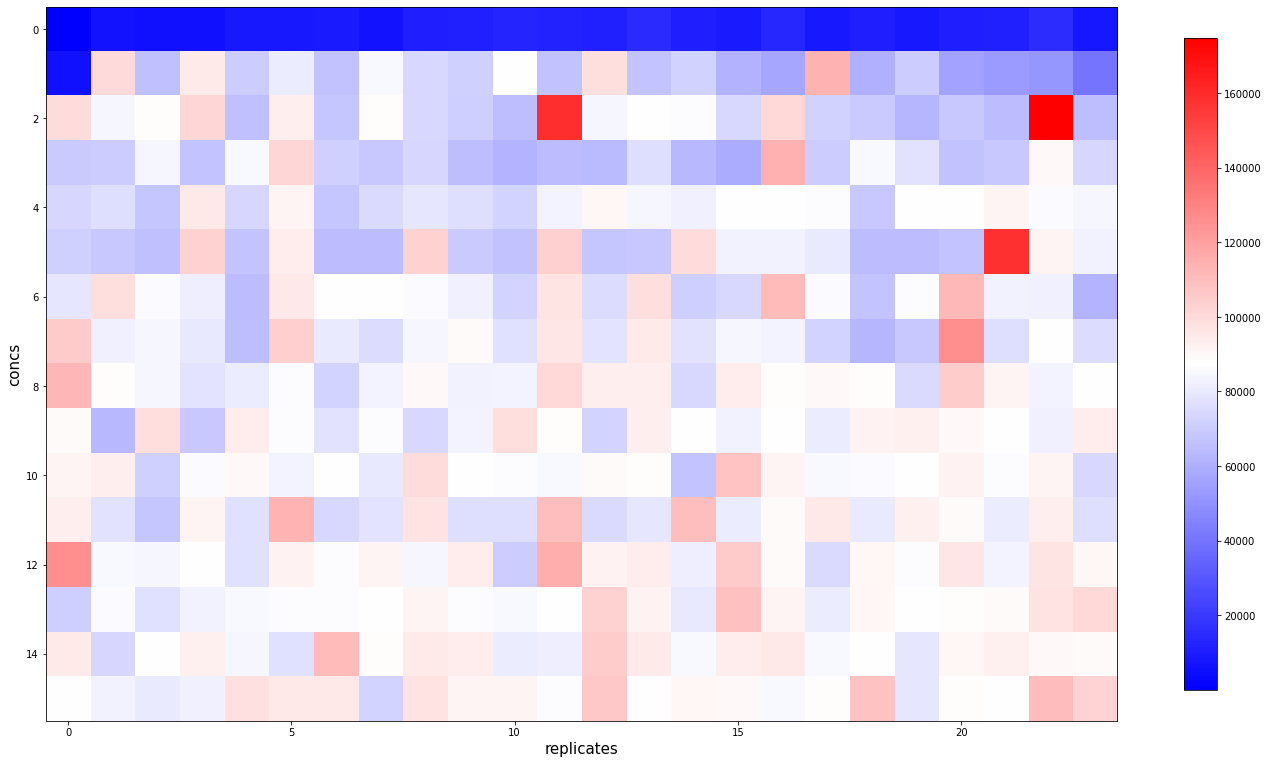

In [13]:
total_samples = []
samples = []
for i in range(16*24):
    samples.append(df1.iloc[i][-1])
    if len(samples) == 24:
        total_samples.append(samples)
        samples = []
plt.figure(figsize=(24, 16))
plt.imshow(total_samples, cmap='bwr')
cbar = plt.colorbar(shrink = 0.75)

plt.xlabel('replicates', fontsize = 15);plt.ylabel('concs', fontsize = 15)
plt.show()

In [17]:
minimum = np.inf
for j in range(len(concs[1:])-6):
    for k in range(59):
        X = np.array(concs[1+j:]).reshape(-1,1)
        y = np.array(Trip_mean)[1:, k][j:].reshape(-1,1)
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X, y)
        grad = reg.coef_
        grad
        std = np.std(reg.predict(X) - y)
        std
        limitD = 3 * std / grad
        if limitD < minimum and limitD > 0:
            minimum = limitD
            concbound = j
            timepoint = k
minimum, concbound, timepoint


(array([[13.33655894]]), 8, 54)

In [18]:
minimum = np.inf
for j in range(len(concs[1:])-6):
    for k in range(59):
        X = np.array(concs[1+j:]).reshape(-1,1)
        y = np.array(Trip_mean_norm)[1:, k][j:].reshape(-1,1)
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X, y)
        grad = reg.coef_
        grad
        std = np.std(reg.predict(X) - y)
        std
        limitD = 3 * std / grad
        if limitD < minimum and limitD > 0:
            minimum = limitD
            concbound_norm = j
            timepoint_norm = k
minimum, concbound_norm, timepoint_norm


(array([[4.17601769]]), 6, 54)

In [19]:
X = np.array(concs[1+concbound:]).reshape(-1,1)
y = np.array(Trip_mean_norm)[1:, timepoint][concbound:].reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
grad = reg.coef_
grad
std = np.std(reg.predict(X) - y)
std
limitD = 3 * std / grad

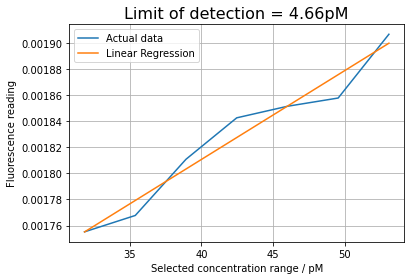

In [20]:
plt.plot(X,y, label = 'Actual data')
plt.plot(X,reg.predict(X),label = 'Linear Regression')
plt.title('Limit of detection = {}pM'.format(round(limitD.ravel()[0],2)), fontsize = 16)
plt.xlabel('Selected concentration range / pM');plt.ylabel('Fluorescence reading');plt.grid();plt.legend()
plt.show()

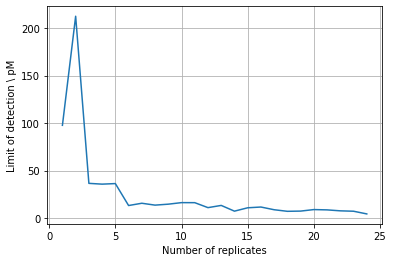

[array([[97.60036331]]),
 array([[212.44080568]]),
 array([[36.48966203]]),
 array([[35.66214224]]),
 array([[36.25155295]]),
 array([[13.14970294]]),
 array([[15.54070916]]),
 array([[13.56951647]]),
 array([[14.57383047]]),
 array([[16.19901201]]),
 array([[16.15111349]]),
 array([[10.93007359]]),
 array([[13.25582277]]),
 array([[7.22216539]]),
 array([[10.76529361]]),
 array([[11.56213842]]),
 array([[8.71320215]]),
 array([[7.05538781]]),
 array([[7.28530711]]),
 array([[8.88235543]]),
 array([[8.55915145]]),
 array([[7.55875346]]),
 array([[7.13964846]]),
 array([[4.31305506]])]

In [32]:
limitDs = []
for replicate in range(1,25):
    Trip1 = df1.loc['Sample X1'][:replicate]
    Trip1_mean = Trip1.mean(axis=0)
    Trip1_std = Trip1.std(axis=0)

    Trip2 = df1.loc['Sample X2'][:replicate]
    Trip2_mean = Trip2.mean(axis=0)
    Trip2_std = Trip2.std(axis=0)

    Trip3 = df1.loc['Sample X3'][:replicate]
    Trip3_mean = Trip3.mean(axis=0)
    Trip3_std = Trip3.std(axis=0)

    Trip4 = df1.loc['Sample X4'][:replicate]
    Trip4_mean = Trip4.mean(axis=0)
    Trip4_std = Trip4.std(axis=0)

    Trip5 = df1.loc['Sample X5'][:replicate]
    Trip5_mean = Trip5[0:2].mean(axis=0)
    Trip5_std = Trip5[0:2].std(axis=0)

    Trip6 = df1.loc['Sample X6'][:replicate]
    Trip6_mean = Trip6.mean(axis=0)
    Trip6_std = Trip6.std(axis=0)

    Trip7 = df1.loc['Sample X7'][:replicate]
    Trip7_mean = Trip7.mean(axis=0)
    Trip7_std = Trip7.std(axis=0)

    Trip8 = df1.loc['Sample X8'][:replicate]
    Trip8_mean = Trip8.mean(axis=0)
    Trip8_std = Trip8.std(axis=0)

    Trip9 = df1.loc['Sample X9'][:replicate]
    Trip9_mean = Trip9.mean(axis=0)
    Trip9_std = Trip9.std(axis=0)

    Trip10 = df1.loc['Sample X10'][:replicate]
    Trip10_mean = Trip10.mean(axis=0)
    Trip10_std = Trip10.std(axis=0)

    Trip11 = df1.loc['Sample X11'][:replicate]
    Trip11_mean = Trip11.mean(axis=0)
    Trip11_std = Trip11.std(axis=0)

    Trip12 = df1.loc['Sample X12'][:replicate]
    Trip12_mean = Trip12.mean(axis=0)
    Trip12_std = Trip12.std(axis=0)

    Trip13 = df1.loc['Sample X13'][:replicate]
    Trip13_mean = Trip13.mean(axis=0)
    Trip13_std = Trip13.std(axis=0)

    Trip14 = df1.loc['Sample X14'][:replicate]
    Trip14_mean = Trip14.mean(axis=0)
    Trip14_std = Trip14.std(axis=0)

    Trip15 = df1.loc['Sample X15'][:replicate]
    Trip15_mean = Trip15.mean(axis=0)
    Trip15_std = Trip15.std(axis=0)

    Trip16 = df1.loc['Sample X16'][:replicate]
    Trip16_mean = Trip16.mean(axis=0)
    Trip16_std = Trip16.std(axis=0)

    Trip_mean = [Trip1_mean,Trip2_mean,Trip3_mean,Trip4_mean,Trip5_mean,Trip6_mean,Trip7_mean,Trip8_mean,Trip9_mean,Trip10_mean,Trip11_mean,Trip12_mean,Trip13_mean,Trip14_mean,Trip15_mean,Trip16_mean]

    X = np.array(concs[1+concbound:]).reshape(-1,1)
    y = np.array(Trip_mean)[1:, timepoint][concbound:].reshape(-1,1)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X, y)
    grad = reg.coef_
    std = np.std(reg.predict(X) - y)
    limitDs.append(3 * std / grad)
plt.plot(np.arange(1,25),np.array(limitDs).ravel())
plt.xlabel('Number of replicates');plt.ylabel('Limit of detection \ pM');plt.grid()
plt.show()
limitDs

Seems best linear region to use if around 1nM, so [500,600,700,800,900,1000,1100,1200,1300,1400]pM

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential(t, a, b, c):
    return a * (1-np.exp(-b * t)) + c
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
t = Time 

In [42]:
def calcKValues(data, func, maxLimit = 20000, normalise = True, plot = False):
  y = data

  if func == 'exponential':
    popt, pcov = curve_fit(exponential, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), 1, np.min(y)], maxfev=20000)
    return popt[1]

  if func == 'sigmoid':
    popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), np.median(t), 1, np.min(y)], maxfev=20000)
    return popt[2]

In [43]:
ks = [calcKValues(mean, 'sigmoid') for mean in Trip_mean]

In [44]:
ks

[0.004415663698875677,
 0.11799624529825008,
 0.12622641629736475,
 0.14071209259962253,
 0.20661794863046754,
 0.15837085984249172,
 0.1559615596090635,
 0.15901752357600724,
 0.15619970646671144,
 0.15981405240477478,
 0.15772029826206937,
 0.15261263482848486,
 0.14380045906200709,
 0.14291757289110113,
 0.11231640142595947,
 0.14639852338968898]

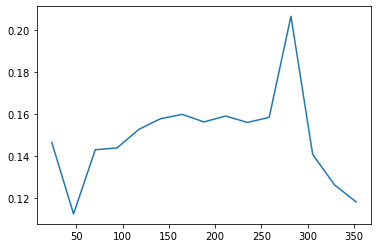

In [49]:
plt.plot(concs,ks[1:][::-1])
# plt.xscale('log')
plt.show()